# 3 Scharpening
- color: 
    - V in HSV
    - Y in YCbCr
- grayscale

In [1]:
# -*- encoding: utf-8 -*-
import sys
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# homorphic filter
from _homomorphicFilter import homomorphic_filter as homo_filter

# env: windows
PATH_IMAGE = 'D:\\My_Data\\me_Docs\\Masterarbeit\\master_border_extraction\\images\\test1.png'
img_origin_color = cv2.imread(PATH_IMAGE, cv2.IMREAD_COLOR)  # color image
img_origin_gray = cv2.imread(PATH_IMAGE, cv2.IMREAD_GRAYSCALE) # gray image

## Grayscale

1. in frequency domain: homorphic filter

In [11]:
# img = cv2.resize(img, (400, 400))
img_homo_filtered = homo_filter(img_origin_gray)

contrast = np.hstack((img_origin_gray, img_homo_filtered))

cv2.namedWindow("contrast", cv2.WINDOW_NORMAL) 
cv2.imshow('contrast', contrast)
cv2.waitKey()
cv2.destroyAllWindows()

2. in spatial domain: USM

In [6]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img_origin_gray, ddepth=-1, kernel=kernel)

sharpening_contrast = np.hstack((img_origin_gray, image_sharp))
cv2.namedWindow("sharpening", cv2.WINDOW_NORMAL) 
cv2.imshow('sharpening', sharpening_contrast)
cv2.waitKey()
cv2.destroyAllWindows()

## TEST for edge detection descriptor

TEST: canny filter

In [9]:
edges = cv2.Canny(img_origin_gray,70,80) # the upper threshold should be lower (about 80)
sharpening_contrast = np.hstack((img_origin_gray, edges))
cv2.namedWindow("canny filter", cv2.WINDOW_NORMAL) 
cv2.imshow('canny filter', sharpening_contrast)
cv2.waitKey()
cv2.destroyAllWindows()

TEST: Marr-Hildreth

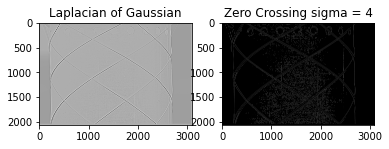

In [2]:
from _marrHildrethFilter import edgesMarrHildreth as marrFilter
_, zero_crossing = marrFilter(img_origin_gray, sigma=4)

TEST: Scharr

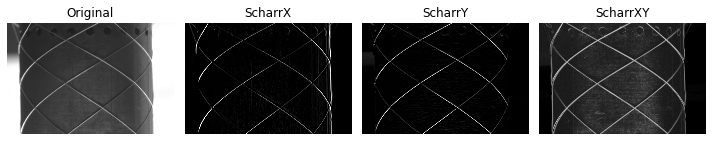

In [10]:
    # 使用函数 filter2D 实现 Scharr 算子
    kernScharrX = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])  # ScharrX kernel
    kernScharrY = np.array([[-3, 10, -3], [0, 0, 10], [3, 10, 3]])  # ScharrY kernel

    # 使用 cv2.Scharr 实现 Scharr 算子
    ScharrX = cv2.Scharr(img_origin_gray, cv2.CV_16S, 1, 0)  # 计算 x 轴方向
    ScharrY = cv2.Scharr(img_origin_gray, cv2.CV_16S, 0, 1)  # 计算 y 轴方向
    absX = cv2.convertScaleAbs(ScharrX)  # 转回 uint8
    absY = cv2.convertScaleAbs(ScharrY)  # 转回 uint8
    ScharrXY = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)  # 用绝对值近似平方根

    plt.figure(figsize=(10, 6))
    plt.subplot(141), plt.axis('off'), plt.title("Original")
    plt.imshow(img_origin_gray, cmap='gray', vmin=0, vmax=255)
    plt.subplot(142), plt.axis('off'), plt.title("ScharrX")
    plt.imshow(ScharrX, cmap='gray', vmin=0, vmax=255)
    plt.subplot(143), plt.axis('off'), plt.title("ScharrY")
    plt.imshow(ScharrY, cmap='gray', vmin=0, vmax=255)
    plt.subplot(144), plt.axis('off'), plt.title("ScharrXY")
    plt.imshow(ScharrXY, cmap='gray')
    plt.tight_layout()
    plt.show()